In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from glob import glob

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_dir = '/kaggle/input/louisiana-flood-2016/train/'
valid_dir = '/kaggle/input/louisiana-flood-2016/test/'
train_csv = '/kaggle/input/louisiana-flood-2016/train.csv'
valid_csv = '/kaggle/input/louisiana-flood-2016/test.csv'

In [3]:
train_df = pd.read_csv(train_csv)
valid_df = pd.read_csv(valid_csv)

In [4]:
train_df.shape, train_df.head()

((270, 3),
       Image ID  Normal  Flooded
 0   2004_0.png       0        0
 1   2008_0.png       0        0
 2    11006.png       1        0
 3  10005_0.png       0        0
 4  15003_0.png       0        0)

In [5]:
valid_df.shape, valid_df.head()

((52, 3),
      Image ID  Normal  Flooded
 0   16000.png       1        0
 1  6007_1.png       0        1
 2    6002.png       1        0
 3  1005_1.png       0        1
 4  5006_0.png       0        0)

## Data distribution

In [6]:
trainDataDbn = {'Normal':train_df['Normal'].value_counts().values[0],
                'Flooded':train_df['Flooded'].value_counts().values[1],
                'Not flooded': train_df['Flooded'].value_counts().values[0] - train_df['Normal'].value_counts().values[0]}
trainDataDbn

{'Normal': 135, 'Flooded': 86, 'Not flooded': 49}

In [7]:
fig = {
  "data": [
    {
      "values": list(trainDataDbn.values()),
      "labels": list(trainDataDbn.keys()),
      "hoverinfo":"label+percent",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Training Data Distribution",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Images",
                "x": 1,
                "y": 1
            },
        ]
    }
}
iplot(fig)

In [8]:
validDataDbn = {'Normal':valid_df['Normal'].value_counts().values[0],
                'Flooded':valid_df['Flooded'].value_counts().values[1],
                'Not flooded': valid_df['Flooded'].value_counts().values[0] - valid_df['Normal'].value_counts().values[0]}
validDataDbn

{'Normal': 26, 'Flooded': 16, 'Not flooded': 10}

In [9]:
fig = {
  "data": [
    {
      "values": list(validDataDbn.values()),
      "labels": list(validDataDbn.keys()),
      "hoverinfo":"label+percent",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Validation Data Distribution",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Images",
                "x": 1,
                "y": 1
            },
        ]
    }
}
iplot(fig)

## Samples

In [10]:
normal_imgs = train_df[train_df['Normal']==1]
normal_imgs['Image ID'].values[:5]

array(['11006.png', '12009.png', '13001.png', '1003.png', '7006.png'],
      dtype=object)

Train Images


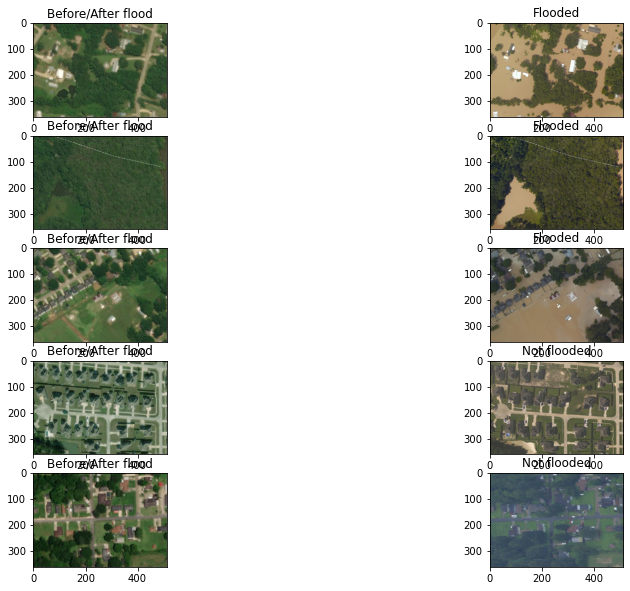

In [11]:
print("Train Images")
fig=plt.figure(figsize=(15, 10))
columns = 2; rows = 5
for i in range(0, columns*rows, 2):
    fig.add_subplot(rows,columns,i+1)
    before_img = train_dir+normal_imgs['Image ID'].values[i]
    plt.imshow(plt.imread(before_img))
    plt.title("Before/After flood")
    fig.add_subplot(rows,columns,i+2)
    flood_img = glob(train_dir+normal_imgs['Image ID'].values[i].split('.')[0]+'_*')
    plt.imshow(plt.imread(flood_img[0]))
    ftitle = 'Flooded' if flood_img[0].split('_')[-1]=='1.png' else 'Not flooded'
    plt.title(ftitle)

In [12]:
normal_imgs = valid_df[valid_df['Normal']==1]
normal_imgs['Image ID'].values[:5]

array(['16000.png', '6002.png', '11003.png', '6007.png', '12007.png'],
      dtype=object)

Valid Images


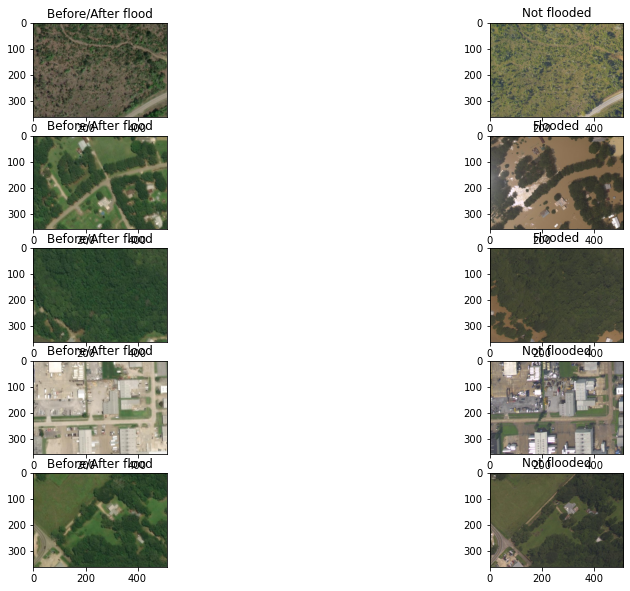

In [13]:
print("Valid Images")
fig=plt.figure(figsize=(15, 10))
columns = 2; rows = 5
for i in range(0, columns*rows, 2):
    fig.add_subplot(rows,columns,i+1)
    before_img = valid_dir+normal_imgs['Image ID'].values[i]
    plt.imshow(plt.imread(before_img))
    plt.title("Before/After flood")
    fig.add_subplot(rows,columns,i+2)
    flood_img = glob(valid_dir+normal_imgs['Image ID'].values[i].split('.')[0]+'_*')
    plt.imshow(plt.imread(flood_img[0]))
    ftitle = 'Flooded' if flood_img[0].split('_')[-1]=='1.png' else 'Not flooded'
    plt.title(ftitle)